In [3]:
import Pkg; Pkg.add("InvertedIndices")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [4]:
using Plots 
using LinearAlgebra
using BenchmarkTools
import Random
using InvertedIndices
using BenchmarkTools

In [5]:
#This function makes a zero square matrix with dimentions = (dimentions x dimentions)
#list_1 and list_2 are two arbitrary list of numbers. Their values are then assigned to the above matrix, leaving the matrix with zeros and non zero elements
#The function returns the final matrix

function make_mtrx(dimentions, list_1, list_2)
  m = zeros(dimentions, dimentions)
  for i in list_1
    for j in list_2
      m[i, j] = 1
    end
  end
  return m
end

make_mtrx (generic function with 1 method)

In [6]:
#This function creates a random matrix, without the use of seed, meaning that every single time the matrix is totaly random
#a and b are the range of random numbers filling the matrix. The matrix is gonna be filled with numbers in range(a, b) 
#x_dim and y_dim is the dimention of the random matrix
#The function reurns the random matrix

function random_matrix_new(a, b, x_dim, y_dim)
  mtrx = rand(a:b, x_dim, y_dim )
  return mtrx
end


random_matrix_new (generic function with 1 method)

In [7]:
#This function creates a random matrix, by using seed, meaning that every single time the matrix can be reproduced
#a and b are the range of random numbers filling the matrix. The matrix is gonna be filled with numbers in range(a, b) 
#x_dim and y_dim is the dimention of the random matrix
#The function reurns the random matrix

function random_matrix(a, b, x_dim, y_dim)
  Random.seed!(1234)
  mtrx = rand(a:b, x_dim, y_dim )
  return mtrx
end

random_matrix (generic function with 1 method)

In [8]:
#This function prints the zeros and non zeros of a matrix
#matrix = read a matrix that we want to print it's zero and non zero elements

function get_zeros_non_zeros(mtrx)
  x_dim = size(mtrx, 1)
  y_dim = size(mtrx, 2)
  s = 0
    for i in range(1, x_dim)
      for j in range(1, y_dim)
        if (a[i, j] == 0.0)
          s = s + 1
        end
      end
    end
    println("Zeros: $s and Non-zeros: ", x_dim * y_dim - s)
  return s
end


get_zeros_non_zeros (generic function with 1 method)

In [9]:
#This function prints all the ij elements of the a matrix
#matrix = reads a matrix that we want

function get_each_element(mtrx)
  x_dim = size(mtrx, 1)
  y_dim = size(mtrx, 2)
  for i in range(1, x_dim)
    for j in range(1, y_dim)
     print("mtrx[$i, $j]  = ", mtrx[i, j], "\n")
    end
  end
end

get_each_element (generic function with 1 method)

In [10]:
#convert adj to S marix
function A2S(AdjMat)
    AdjMat += I #add the identity to the diagonal, add self-loops
    diag = Diagonal(vec(sum(AdjMat,dims=2) .^ (-1/2)))
    return (diag) * AdjMat * (diag) #return the normalized S matrix
end

A2S (generic function with 1 method)

In [11]:
#This function creates the a_matrix, converts it to s matrix, makes random theta matrix, makes random x matrix. All the random are using seed. No sparce matrix
#It multiplies s * x * th and returns a, s, x, th, the Final = s * x * th  
#a_dim = a_matrix dimention, note that _mtrix is a square matrix, so number_of_rows = number_of_columns
#a_down_lim = a_mtrix till be filled in a random range(k, l), a_down_lim = k
#a_up_lim = a_mtrix till be filled in a random range(k, l), a_down_lim = l
#x_y_dim = the number of columns of x matrix
#x_down_lim = x_matrix will be filled in a random range(b, c), x_down_lim = b
#x_up_lim = x_matrix will be filled in a random range(b, c), x_up_lim = c
#th_y_dim = the number of columns of th_matrix
#th_down_lim = x_matrix will be filled in a random range(d, e), x_down_lim = d
#th_up_lim = x_matrix will be filled in a random range(d, e), x_up_lim = e

function initial_matrix(a_dim, a_down_lim, a_up_lim, x_y_dim, x_down_lim, x_up_lim, th_y_dim, th_down_lim, th_up_lim)
  a = random_matrix(a_down_lim, a_up_lim, a_dim, a_dim)
  aj = A2S(a)
  x = random_matrix(x_down_lim, x_up_lim, a_dim, x_y_dim)
  th = random_matrix(th_down_lim, th_up_lim, x_y_dim, th_y_dim)
  Final = aj * x * th  
  return a, aj, x, th, Final 
end

initial_matrix (generic function with 1 method)

In [12]:
#This function reduces the size of a matrix by throughing the last n_col_row_to_reduce rows-columns
#a = aj matrix
#x = xmatrix 
#th = th_matrix
#n_col_row_to_reduce = how many rows-columns we want to drop

function reduce_size(a, x, th, n_col_row_to_reduce)
  x_dim = size(a, 1)
  y_dim = size(a, 2)
  a_reduced = a[Not(x_dim - n_col_row_to_reduce: end), Not(y_dim - n_col_row_to_reduce : end)]
  aj_reduced = A2S(a_reduced)
  x_reduced = x[Not(x_dim - n_col_row_to_reduce: end), :]
  Final_reduced = aj_reduced * x_reduced * th
  return Final_reduced
  end

reduce_size (generic function with 1 method)

In [13]:
#get the mean average error of two matrices, the one of them is reduced
#mtrx = the NOT reduced matrix
#mtrx_reduced = the reduced matrix
#The function returns the mean average error of tow matrices

function mae(mtrx, mtrx_reduced)
  x = size(mtrx_reduced, 1)
  y = size(mtrx_reduced, 2)
  s = 0
  for i in range(1, x)
    for j in range(1, y)
      s = s + abs(mtrx[i, j] - mtrx_reduced[i, j])
    end
  end
  mae = sqrt(s/(x*y))
  return mae 
  end

mae (generic function with 1 method)

In [14]:
#This function makes the aj, s, x, th. Then reduces the size of aj and gets the mean average error between the initial s*x*th and s_reduced*x*th and
#n_drop_row_col = how many rows-columns we want to drop
#a_dim = a_matrix dimention, note that _mtrix is a square matrix, so number_of_rows = number_of_columns
#a_down_lim = a_mtrix till be filled in a random range(k, l), a_down_lim = k
#a_up_lim = a_mtrix till be filled in a random range(k, l), a_down_lim = l
#x_y_dim = the number of columns of x matrix
#x_down_lim = x_matrix will be filled in a random range(b, c), x_down_lim = b
#x_up_lim = x_matrix will be filled in a random range(b, c), x_up_lim = c
#th_y_dim = the number of columns of th_matrix
#th_down_lim = x_matrix will be filled in a random range(d, e), x_down_lim = d
#th_up_lim = x_matrix will be filled in a random range(d, e), x_up_lim = e

function total_error(n_drop_row_col, a_dims, a_down_lim, a_up_lim, x_y_dim, x_down_lim, x_up_lim, th_y_dim, th_down_lim, th_up_lim )
  mean_average_error = Vector{Float64}()
  a, aj, x, th, Final = initial_matrix(a_dims, a_down_lim, a_up_lim, x_y_dim, x_down_lim, x_up_lim, th_y_dim, th_down_lim, th_up_lim)
  for i in range(-1, n_drop_row_col)
    F1 = reduce_size(a, x, th, i)
    MAE = mae(Final, F1)
    append!(mean_average_error,MAE)
  end
  skip = collect(-1: n_drop_row_col)
  return(mean_average_error, skip)
  end


total_error (generic function with 1 method)

In [15]:
 #This function splits the alpha(aj) matrix in smaller matrices which size is (n_lines_to_split x n_lines_to_split). 
 #a_mtrx = the a_matrix
 #n_lines_to_split is the number of rows, columns the small matrix will have.
 #The function returns a dictionary. Each element of the dictionary is one of the smaller matrices.

 function split_alpha_matrix(a_mtrx, n_lines_to_split)
  x = size(a_mtrx, 1)
  y = size(a_mtrx, 2)
  n = div(x, n_lines_to_split)
  dictionary = Dict()
  count = 1
  k = 1
  for i in range(1, n_lines_to_split)
    z = 1
    for j in range(1, n_lines_to_split)
      dictionary["a_$count"] = a_mtrx[k: k + n - 1, z: j*n ]
      count = count + 1
      z = z + n
    end
    k = k + n
  end
  return(dictionary)
end

split_alpha_matrix (generic function with 1 method)

In [16]:
 #This function splits the x matrix in smaller matrices which size is (n_lines_to_split x n_lines_to_split). 
 #a_mtrx = the a_matrix
 #n_lines_to_split is the number of rows, columns the small matrix will have.
 #The function returns a dictionary. Each element of the dictionary is one of the smaller matrices.
  
  function split_x_matrix(x_mtrx, n_lines_to_split)
  x = size(x_mtrx, 1)
  n = div(x, n_lines_to_split)
  #print(n)
  dictionary = Dict()
  z = 1
  for i in range(1, n_lines_to_split)
    dictionary["x_$i"] = x_mtrx[z : z + n - 1 , 1:end]
    z = z + n
  end
  return(dictionary)
  end 


split_x_matrix (generic function with 1 method)

In [17]:
#This matrix turns s_matrix*x_matrix (in dictionary form), to matrix
#dict = the dictionary we want to conver to matrix
#x_mtrx = x_matrix
#n_lines_to_split =  is the number of rows, columns the small matrix will have.
#It returns the s_matrix*x_matrix in a matrix form

function s_matrix_x_xmtrx_dictionary_to_matrix(dict, x_splited_length, x_mtrx, n_lines_to_split)
  i = 1 
  mtrx_reduced_dictionary = Dict()
  count = 1
  num = div(size(x_mtrx, 1), n_lines_to_split)
  while (i <= length(dict)) 
    x_y_dim = size(x_mtrx, 2)
    s = zeros(num, x_y_dim)
    k = 1 
    while k <= x_splited_length  
      s = s + dict["aj_x_$i"] 
      k = k + 1 
      i = i + 1
    end 
  mtrx_reduced_dictionary["A_$count"] = s
  count = count + 1
  end 
  s_ = vcat(mtrx_reduced_dictionary["A_1"])
  for i in range(2, length(mtrx_reduced_dictionary))
    aux = vcat(s_, mtrx_reduced_dictionary["A_$i"])
    s_ = aux
  end
  return s_ 
end 

s_matrix_x_xmtrx_dictionary_to_matrix (generic function with 1 method)

In [18]:
#This function reads a_matrix, x_matrix, th_matrix, and the number of rows, columns the splited matrices will have.
#a_mmtrx = a_matrix
#x_mtrx = x_matrix
#th_mtrx = th_matrix
#n_lines_to_split = number of rows, columns the small matrices will have
#it splits a_matrix, x_matrix into smaller matrices by saving the in dictionaries and also find s matrix for the splited a_matrix
#then it calculates the s_splited*x_splited, saves it in dictionary and then makes it matrix
#It calculates the s_splited*x_splite[as a matrix])*th_matrix
#It returns the s_splited*x_splite*th_matrix as a matrix

function multiply_splited_2(a_mtrx, x_mtrx, th_mtrx, n_lines_to_split)
  a_splited = split_alpha_matrix(a_mtrx, n_lines_to_split)
  x_splited = split_x_matrix(x_mtrx, n_lines_to_split)
  #x_y_dim = size(x_mtrx, 2)
  aj_splited = Dict()
  for i in range(1, length(a_splited))
    aj_splited["aj_$i"] = A2S(a_splited["a_$i"])
  end
  aj_x = Dict()
  k = 1
  while k <= length(a_splited)
    for i in range(1, length(x_splited))
      aj_x["aj_x_$k"] = aj_splited["aj_$k"] * x_splited["x_$i"] 
      k = k + 1
    end
  end
  aj_x_mtrx = s_matrix_x_xmtrx_dictionary_to_matrix(aj_x, length(x_splited), x_mtrx, n_lines_to_split)
  final = aj_x_mtrx * th_mtrx
  #show(stdout, "text/plain", final)
  return(final)
end


multiply_splited_2 (generic function with 1 method)

In [19]:
#This function gets the memory of many matrices, filled randomly. The matrices are filled without using seed.
#0, 150 is the range of the matrix. The matrix is filled in the range (0, 150)
#from = the size of the first matrix
#to = the size of the last matrix
#step = the step the matrices are created
#For example: the first random matrix is (100 x 100), the next will be ((100 + step) x (100 + step)) ...

function get_memory_fill_random_matrix(from, to, step)
benchmarkDicts = Dict()
benchmarkDicts["memory"] = []
i_list = []
for i in from:step:to
  mem = @benchmark random_matrix_new(0, 150, $i, $i);
  push!(benchmarkDicts["memory"], mem.memory/10^6)
  append!(i_list, i)
end
return (i_list, benchmarkDicts["memory"])
end 

get_memory_fill_random_matrix (generic function with 1 method)

In [20]:
#This function gets the memory of many matrices, filled randomly. The matrices are filled USING seed.
#0, 150 is the range of the matrix. The matrix is filled in the range (0, 150)
#from = the size of the first matrix
#to = the size of the last matrix
#step = the step the matrices are created
#For example: the first random matrix is (100 x 100), the next will be ((100 + step) x (100 + step)) ...

function get_matrix_memory(a_down_lim, a_up_lim, a_dim)
  memory_list = Vector{Float64}()
  benchmarkDicts["memory"] = []
  bb = @benchmark random_matrix($a_down_lim, $a_up_lim, $a_dim, $a_dim)
  push!(benchmarkDicts["memory"], bb.memory)
  return(benchmarkDicts["memory"])
end

get_matrix_memory (generic function with 1 method)

In [21]:
#This function creates a random matrix by multyplying two random matrices
#0, 150 is the range of the matrix. The matrix is filled in the range (0, 150)
#a_dim = is the dimention of the initial SQUARE matrix we will use to produce a final matrix
#final_dim = the dimention of the final matrix we want to make
#The function returns the final matrix
#Plese use numbers such that final_dim/a_dim = integer, so everything is included

function create_matrix_by_multiply(a_dim, final_dim)
  a_test = random_matrix_new(0, 150, a_dim, a_dim)
  a_f_row = a_test
  a_f_col = a_test
  for i in range(1, final_dim/a_dim -1)
    a_f_row = vcat(a_f_row, random_matrix_new(0, 150, a_dim, a_dim));
  end
  for i in range(1, final_dim/a_dim -1)
    a_f_col = hcat(a_f_col, random_matrix_new(0, 150, a_dim, a_dim));
  end
  #print("\n")
  ff = a_f_row * a_f_col
  return(ff)
  end

create_matrix_by_multiply (generic function with 1 method)

In [22]:
#This function gets the memory of many matrices, filled randomly without seed and then multyplied in order to get a random matrix
#0, 150 is the range of the matrix. The matrix is filled in the range (0, 150)
#from = the size of the first matrix
#to = the size of the last matrix
#step = the step the matrices are created
#For example: the first random matrix is (100 x 100), the next will be ((100 + step) x (100 + step)) ...


function get_memory(from, to, step, a_dim)
benchmarkDicts = Dict()
benchmarkDicts["memory"] = []
i_list = []
for i in from:step:to
  mem = @benchmark create_matrix_by_multiply($a_dim, $i);
  push!(benchmarkDicts["memory"], mem.memory/10^6)
  append!(i_list, i)
end
return (i_list, benchmarkDicts["memory"])
end 



get_memory (generic function with 1 method)

In [23]:
#This function makes a matrix by concat smaller radomly produced matrices. The smaler matrices are produced without seed.
#a_dim = is the dimention of the initial SQUARE matrix we will use to produce a final matrix
#final_dim = the dimention of the final matrix we want to make

function make_matrix_by_concat_others(a_dim, final_dim)
  a_test = random_matrix_new(0, 150, a_dim, a_dim)
  a = a_test
  for i in range(1, final_dim/a_dim -1)
    a = vcat(a, random_matrix_new(0, 150, a_dim, a_dim))
  end
  x = size(a, 1)
  y = size(a, 2)
  for i in range(1, final_dim/a_dim -1)
    aux = hcat(a, random_matrix_new(0, 150, x, y))
    a = aux 
  end
  return a
  end




make_matrix_by_concat_others (generic function with 1 method)

In [24]:
#This function gets the memory of many matrices, filled randomly without seed and by using concat method
#0, 150 is the range of the matrix. The matrix is filled in the range (0, 150)
#from = the size of the first matrix
#to = the size of the last matrix
#step = the step the matrices are created
#For example: the first random matrix is (100 x 100), the next will be ((100 + step) x (100 + step)) ...

function get_memory_concat(from, to, step, a_dim)
benchmarkDicts = Dict()
benchmarkDicts["memory"] = []
i_list = []
for i in from:step:to
  mem = @benchmark make_matrix_by_concat_others($a_dim, $i);
  push!(benchmarkDicts["memory"], mem.memory/10^6)
  append!(i_list, i)
end
return (i_list, benchmarkDicts["memory"])
end 

get_memory_concat (generic function with 1 method)

In [25]:
error_, skip_ = total_error(200, 1000, 0, 10, 10, -4, 4, 5, -2, 2);

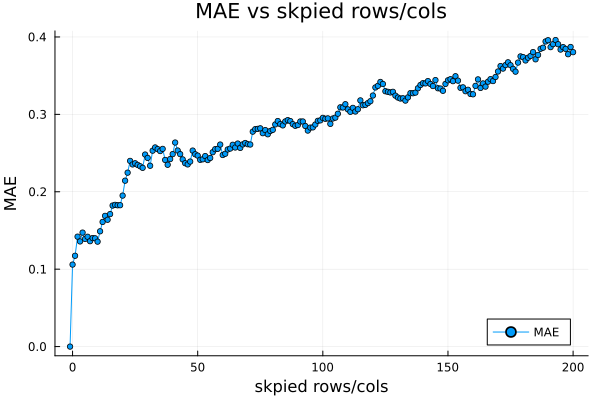

In [26]:
plot(skip_, # x-axis
    error_, # yaxis
    markershape=:circle, 
    markersize=3,
    title = "MAE vs skpied rows/cols",
    xlabel = "skpied rows/cols",
    label = "MAE",
    legend=:bottomright,
    ylabel = "MAE")

In [27]:
a, aj, x, th, final = initial_matrix(1000, 0, 150, 20, -4, 4, 5, -2, 2);


In [28]:
f = multiply_splited_2(a, x, th, 1);

In [29]:
mae_splited = Vector{Float64}()
for i in range(1, 100)
  f = multiply_splited_2(a, x, th, i);
  mae_spl = mae(final, f);
  append!(mae_splited, mae_spl)
  end

In [30]:
counter = 1
counter_list = Vector{Float64}()
for i in mae_splited
  append!(counter_list, counter)
  counter = counter + 1
end

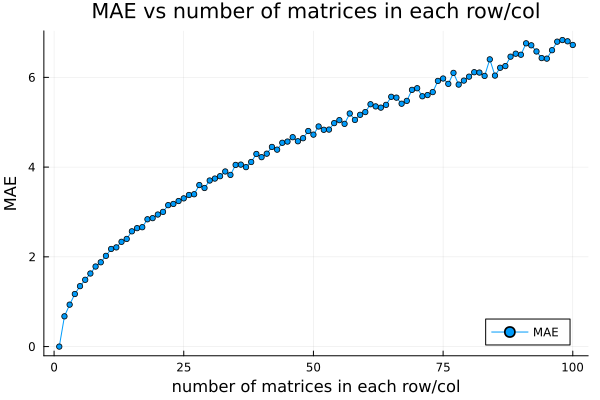

In [31]:
plot(counter_list, # x-axis
    mae_splited, # yaxis
    markershape=:circle, 
    markersize=3,
    title = "MAE vs number of matrices in each row/col",
    xlabel = "number of matrices in each row/col",
    label = "MAE",
    legend=:bottomright,
    ylabel = "MAE")

In [32]:
x_classical, y_classical = get_memory_fill_random_matrix(1000, 10000, 1000);

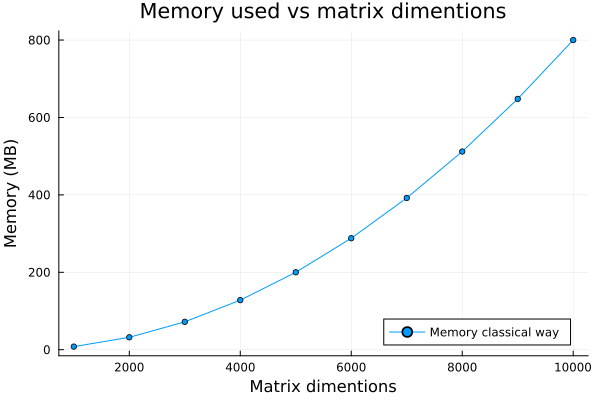

In [33]:
plot(x_classical, # x-axis
    y_classical, # yaxis
    markershape=:circle, 
    markersize=3,
    title = "Memory used vs matrix dimentions",
    xlabel = "Matrix dimentions",
    label = "Memory classical way",
    legend=:bottomright,
    ylabel = "Memory (MB)")

In [34]:
x1, y1 = get_memory(1000, 10000, 1000, 1);

In [35]:
x100, y100 = get_memory(1000, 10000, 1000, 100);

In [36]:
x1000, y1000 = get_memory(1000, 10000, 1000, 1000);

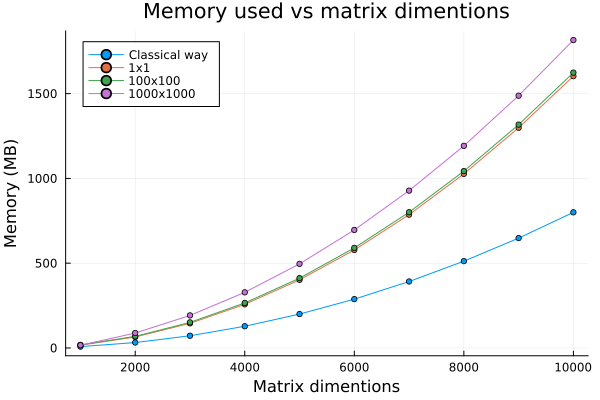

In [37]:
plot(x_classical, # x-axis
    y_classical, # yaxis
    markershape=:circle, 
    markersize=3,
    title = "Memory used vs matrix dimentions",
    xlabel = "Matrix dimentions",
    label = "Classical way",
    legend=:bottomright,
    ylabel = "Memory (MB)")


    plot!(x1, # x-axis
    y1, # yaxis
    markershape=:circle, 
    markersize=3,
    title = "Memory used vs matrix dimentions",
    xlabel = "Matrix dimentions",
    label = "1x1",
    legend=:topleft,
    ylabel = "Memory (MB)")

    plot!(x100, # x-axis
    y100, # yaxis
    markershape=:circle, 
    markersize=3,
    title = "Memory used vs matrix dimentions",
    xlabel = "Matrix dimentions",
    label = "100x100",
    legend=:topleft,
    ylabel = "Memory (MB)")

    plot!(x1000, # x-axis
    y1000, # yaxis
    markershape=:circle, 
    markersize=3,
    title = "Memory used vs matrix dimentions",
    xlabel = "Matrix dimentions",
    label = "1000x1000",
    legend=:topleft,
    ylabel = "Memory (MB)")

In [38]:
x_concat_1, y_concat_1 = get_memory_concat(100, 2000, 100, 1);

In [39]:
x_concat_10, y_concat_10 = get_memory_concat(100, 2000, 100, 10);

In [40]:
x_concat_100, y_concat_100 = get_memory_concat(100, 2000, 100, 100);

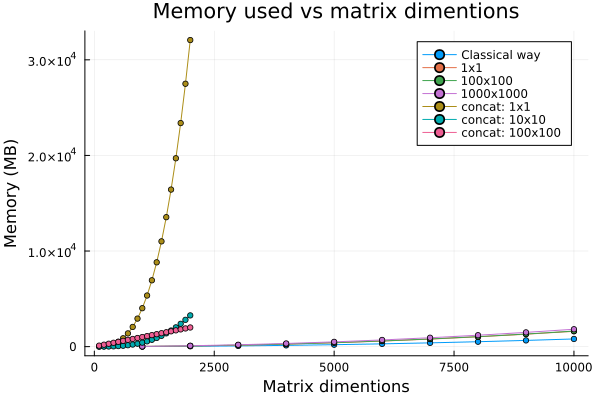

In [41]:
plot(x_classical, # x-axis
    y_classical, # yaxis
    markershape=:circle, 
    markersize=3,
    title = "Memory used vs matrix dimentions",
    xlabel = "Matrix dimentions",
    label = "Classical way",
    legend=:topright,
    ylabel = "Memory (MB)")


    plot!(x1, # x-axis
    y1, # yaxis
    markershape=:circle, 
    markersize=3,
    title = "Memory used vs matrix dimentions",
    xlabel = "Matrix dimentions",
    label = "1x1",
    legend=:topright,
    ylabel = "Memory (MB)")

    plot!(x100, # x-axis
    y100, # yaxis
    markershape=:circle, 
    markersize=3,
    title = "Memory used vs matrix dimentions",
    xlabel = "Matrix dimentions",
    label = "100x100",
    legend=:topright,
    ylabel = "Memory (MB)")

    plot!(x1000, # x-axis
    y1000, # yaxis
    markershape=:circle, 
    markersize=3,
    title = "Memory used vs matrix dimentions",
    xlabel = "Matrix dimentions",
    label = "1000x1000",
    legend=:topright,
    ylabel = "Memory (MB)")

    plot!(x_concat_1, # x-axis
    y_concat_1, # yaxis
    markershape=:circle, 
    markersize=3,
    title = "Memory used vs matrix dimentions",
    xlabel = "Matrix dimentions",
    label = "concat: 1x1",
    legend=:topright,
    ylabel = "Memory (MB)")

    plot!(x_concat_10, # x-axis
    y_concat_10, # yaxis
    markershape=:circle, 
    markersize=3,
    title = "Memory used vs matrix dimentions",
    xlabel = "Matrix dimentions",
    label = "concat: 10x10",
    legend=:topright,
    ylabel = "Memory (MB)")

    plot!(x_concat_100, # x-axis
    x_concat_100, # yaxis
    markershape=:circle, 
    markersize=3,
    title = "Memory used vs matrix dimentions",
    xlabel = "Matrix dimentions",
    label = "concat: 100x100",
    legend=:topright,
    ylabel = "Memory (MB)")